In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

In [49]:
#input_data =  pd.read_csv(r'C:\Users\vikra\Downloads\Fiserv_data_2019-01-01_to_2024-09-01\Fiserv_data_2019-01-01_to_2024-09-01.csv')
data =  pd.read_csv(r'C:\Users\vikra\Downloads\Fiserv_data_2023-01-01_to_2023-12-01\Fiserv_data_2023-01-01_to_2023-12-01.csv')

In [32]:
input_data.head()

Period                                  Geo Sector Name Sub-Sector Name  \
0  20230101  Atlanta-Sandy Springs-Alpharetta GA         All             All   
1  20230101        Boston-Cambridge-Newton MA-NH         All             All   
2  20230101    Chicago-Naperville-Elgin IL-IN-WI         All             All   
3  20230101       Dallas-Fort Worth-Arlington TX         All             All   
4  20230101    Los Angeles-Long Beach-Anaheim CA         All             All   

   Sales Index - SA  Transactional Index - SA  Sales MOM % - SA  \
0            130.67                     99.07             -0.14   
1            140.40                    100.53             -0.29   
2            121.52                    104.40             -5.98   
3            142.27                    106.51              0.42   
4            133.61                    102.47             -0.26   

   Sales YOY % - SA  Transaction MOM % - SA  Transaction YOY %  - SA  \
0              6.57                    1.66                     8.31   
1              9.90                    1.65                     5.43   
2              5.44                    4.64                     6.09   
3              4.10                    2.17                     2.82   
4             10.89                   -0.71                     6.90   

   Sales Index - NSA  Transactional Index - NSA  Sales MOM % - NSA  \
0             124.21                      92.33              -3.62   
1             126.37                      89.93              -8.33   
2             111.66                      92.15             -11.82   
3             133.14                      99.83              -3.21   
4             128.15                      97.39              -3.28   

   Sales YOY % - NSA  Transaction MOM % - NSA  Transaction YOY % - NSA  
0               7.68                    -3.87                     8.64  
1              11.96                    -8.30                     6.04  
2               6.85                    -5.21                     5.82  
3               4.60                    -2.35                     3.10  
4              12.92                    -4.06                     7.24

In [33]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25069 entries, 0 to 25068
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Period                     25069 non-null  int64  
 1   Geo                        25069 non-null  object 
 2   Sector Name                25069 non-null  object 
 3   Sub-Sector Name            25069 non-null  object 
 4   Sales Index - SA           25009 non-null  float64
 5   Transactional Index - SA   25009 non-null  float64
 6   Sales MOM % - SA           24757 non-null  float64
 7   Sales YOY % - SA           24507 non-null  float64
 8   Transaction MOM % - SA     24757 non-null  float64
 9   Transaction YOY %  - SA    24507 non-null  float64
 10  Sales Index - NSA          25069 non-null  float64
 11  Transactional Index - NSA  25069 non-null  float64
 12  Sales MOM % - NSA          24817 non-null  float64
 13  Sales YOY % - NSA          24566 non-null  flo

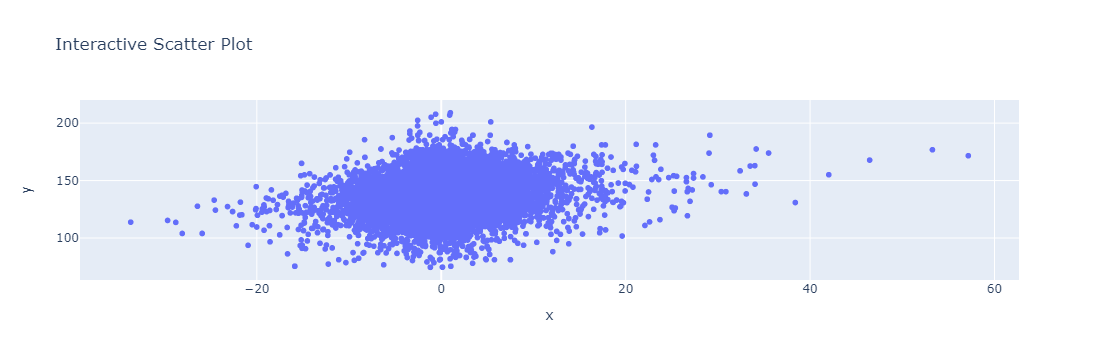

In [58]:
import plotly.express as px

df = pd.DataFrame({'x': input_data['Sales MOM % - SA'], 'y': input_data['Sales Index - SA']})
fig = px.scatter(df, x='x', y='y', title='Interactive Scatter Plot')
fig.show() 

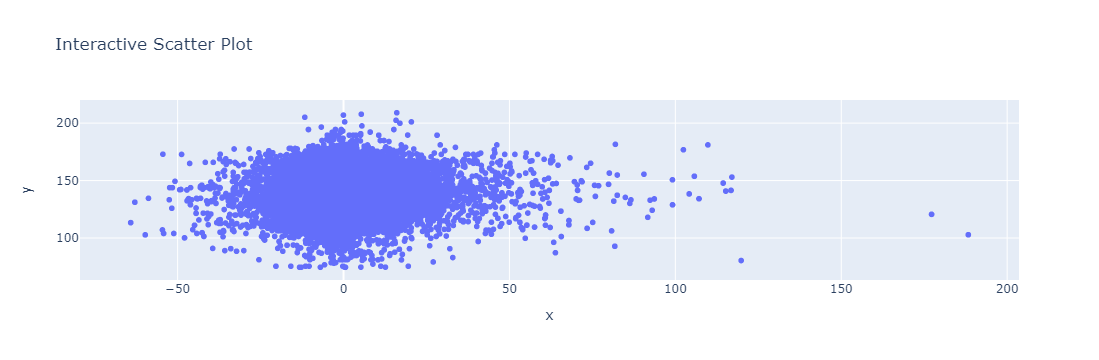

In [35]:
df = pd.DataFrame({'x': input_data['Transaction MOM % - NSA'], 'y': input_data['Sales Index - SA']})
fig = px.scatter(df, x='x', y='y', title='Interactive Scatter Plot')
fig.show() 

In [38]:
df = pd.DataFrame({'x': input_data['Transaction MOM % - NSA'], 'y': input_data['Period']})
fig = px.scatter(df, x='x', y='y', title='Interactive Scatter Plot')
fig.show()

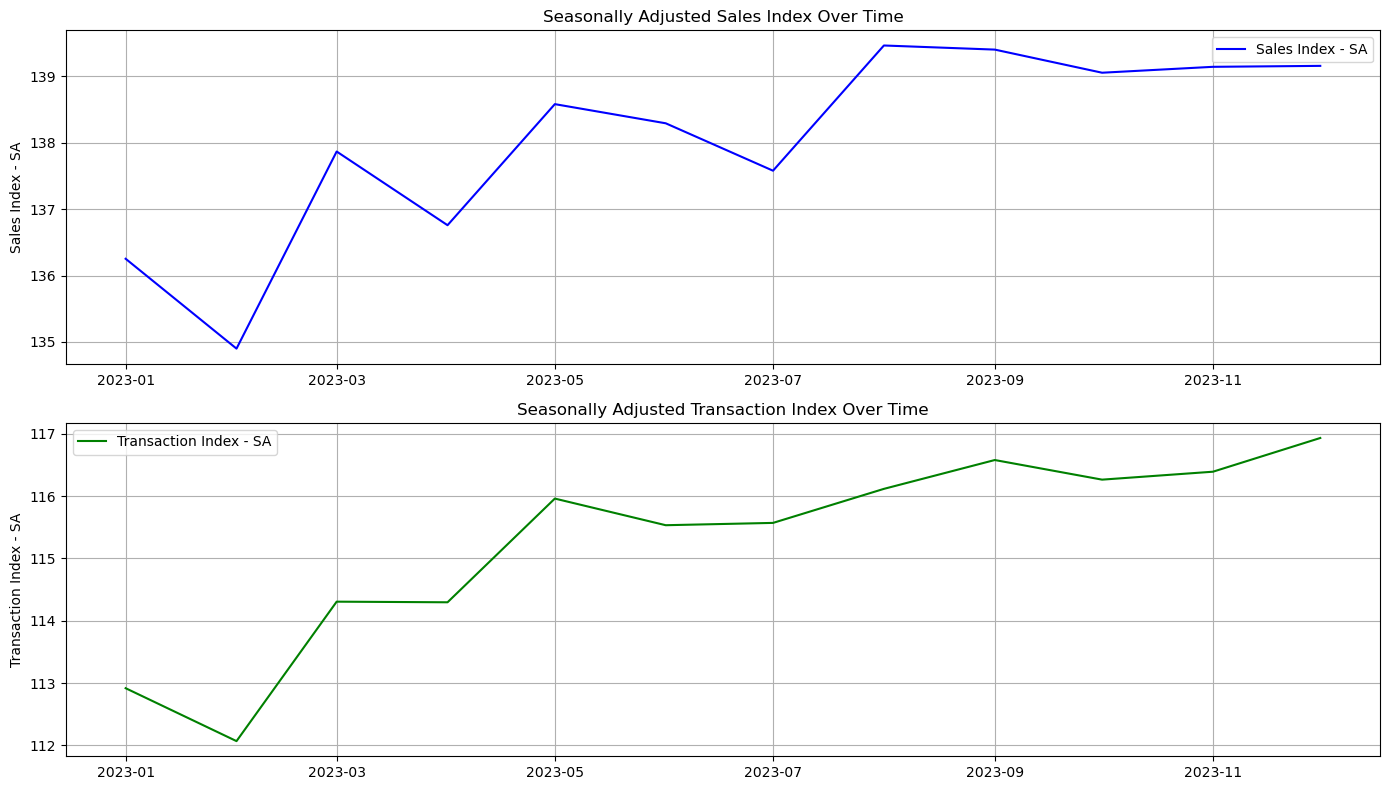

In [52]:
# Re-import necessary libraries and dataset to proceed with the analysis
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
#file_path = '/mnt/data/Fiserv_data_2023-01-01_to_2023-12-01.csv'
#data = pd.read_csv(file_path)

# Convert 'Period' to datetime for easier time-based analysis
data['Period'] = pd.to_datetime(data['Period'], format='%Y%m%d')

# Aggregate data by period for sales and transactional indices
time_series_sales_sa = data.groupby('Period')['Sales Index - SA'].mean()
time_series_trans_sa = data.groupby('Period')['Transactional Index - SA'].mean()

time_series_sales_nsa = data.groupby('Period')['Sales Index - NSA'].mean()
time_series_trans_nsa = data.groupby('Period')['Transactional Index - NSA'].mean()

# Plot seasonally adjusted data
plt.figure(figsize=(14, 8))

# Sales Index - SA
plt.subplot(2, 1, 1)
plt.plot(time_series_sales_sa, label='Sales Index - SA', color='blue')
plt.title('Seasonally Adjusted Sales Index Over Time')
plt.ylabel('Sales Index - SA')
plt.grid(True)
plt.legend()

# Transaction Index - SA
plt.subplot(2, 1, 2)
plt.plot(time_series_trans_sa, label='Transaction Index - SA', color='green')
plt.title('Seasonally Adjusted Transaction Index Over Time')
plt.ylabel('Transaction Index - SA')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


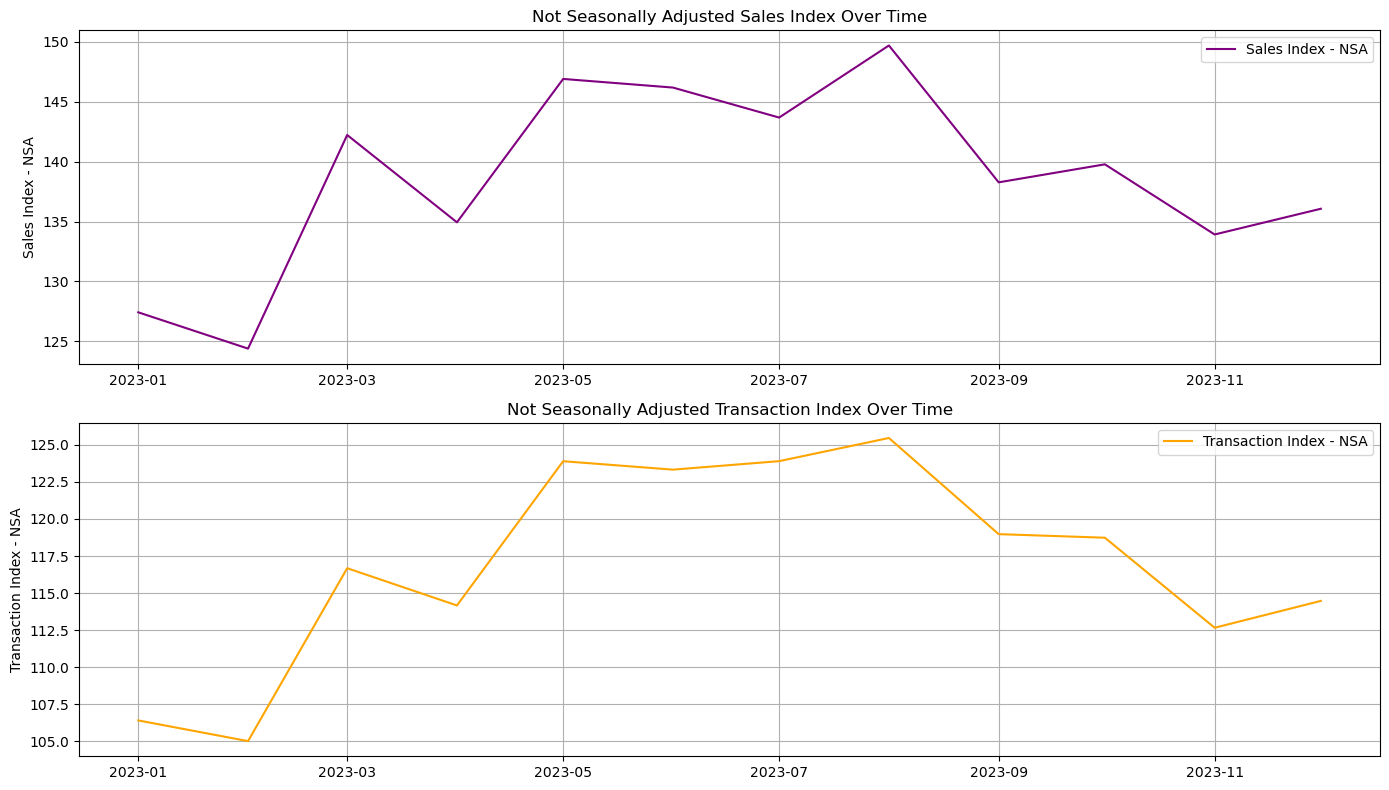

In [53]:
# Plot Not Seasonally Adjusted data (NSA)
plt.figure(figsize=(14, 8))

# Sales Index - NSA
plt.subplot(2, 1, 1)
plt.plot(time_series_sales_nsa, label='Sales Index - NSA', color='purple')
plt.title('Not Seasonally Adjusted Sales Index Over Time')
plt.ylabel('Sales Index - NSA')
plt.grid(True)
plt.legend()

# Transaction Index - NSA
plt.subplot(2, 1, 2)
plt.plot(time_series_trans_nsa, label='Transaction Index - NSA', color='orange')
plt.title('Not Seasonally Adjusted Transaction Index Over Time')
plt.ylabel('Transaction Index - NSA')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


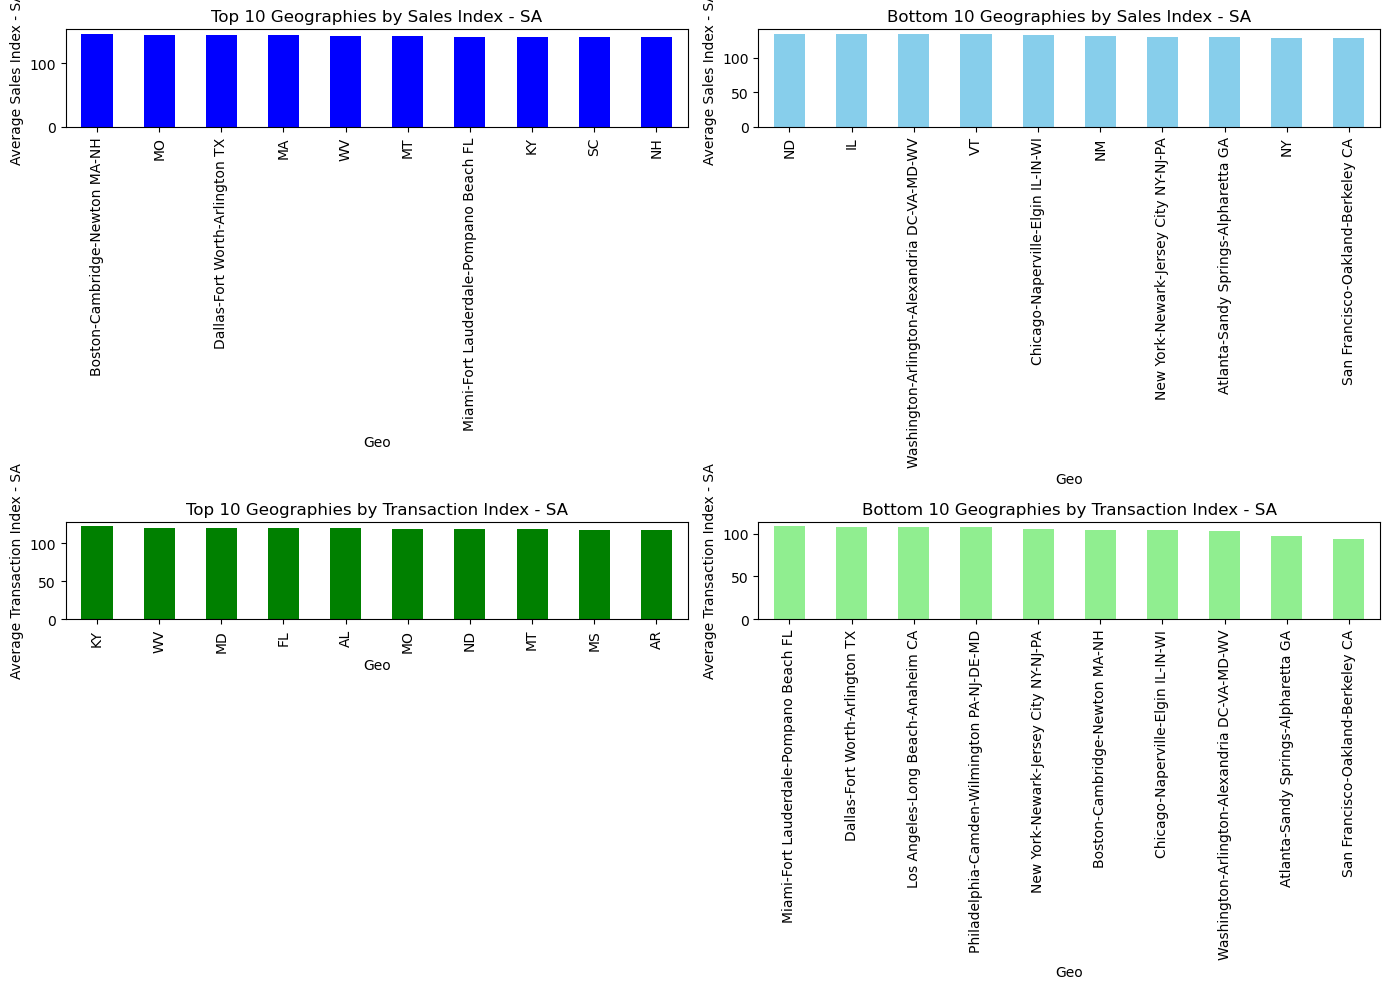

In [54]:
# Calculate the average Sales and Transaction indices by Geography
geo_sales_sa = data.groupby('Geo')['Sales Index - SA'].mean().sort_values(ascending=False)
geo_trans_sa = data.groupby('Geo')['Transactional Index - SA'].mean().sort_values(ascending=False)

# Plot top 10 and bottom 10 geographies by Sales and Transaction indices
plt.figure(figsize=(14, 10))

# Top 10 Geographies - Sales Index
plt.subplot(2, 2, 1)
geo_sales_sa.head(10).plot(kind='bar', color='blue')
plt.title('Top 10 Geographies by Sales Index - SA')
plt.ylabel('Average Sales Index - SA')

# Bottom 10 Geographies - Sales Index
plt.subplot(2, 2, 2)
geo_sales_sa.tail(10).plot(kind='bar', color='skyblue')
plt.title('Bottom 10 Geographies by Sales Index - SA')
plt.ylabel('Average Sales Index - SA')

# Top 10 Geographies - Transaction Index
plt.subplot(2, 2, 3)
geo_trans_sa.head(10).plot(kind='bar', color='green')
plt.title('Top 10 Geographies by Transaction Index - SA')
plt.ylabel('Average Transaction Index - SA')

# Bottom 10 Geographies - Transaction Index
plt.subplot(2, 2, 4)
geo_trans_sa.tail(10).plot(kind='bar', color='lightgreen')
plt.title('Bottom 10 Geographies by Transaction Index - SA')
plt.ylabel('Average Transaction Index - SA')

plt.tight_layout()
plt.show()


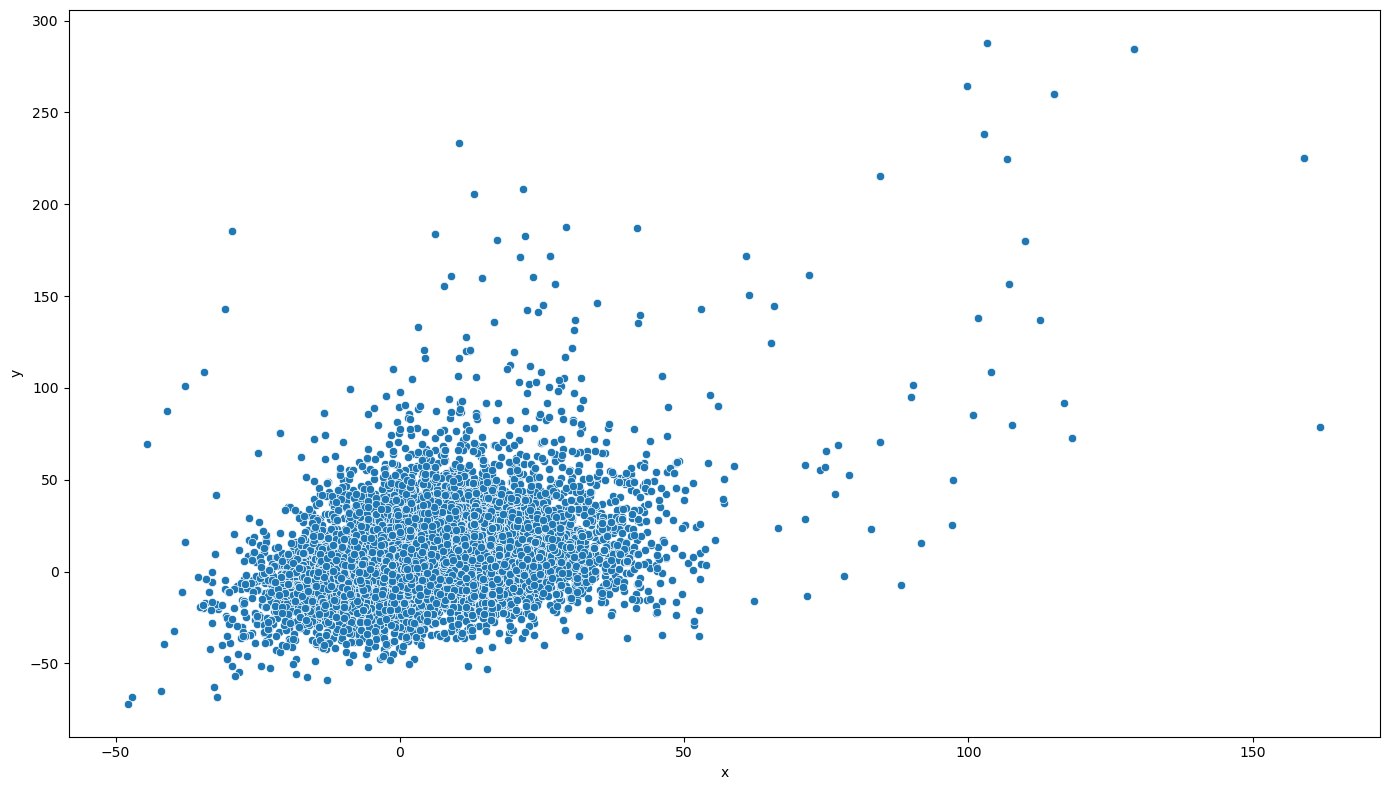

In [69]:
plt.figure(figsize=(14,8))
df = pd.DataFrame({'x': data['Sales YOY % - SA'], 'y': data['Transaction YOY % - NSA']})
#fig = px.scatter(df, x='x', y='y', title='Interactive Scatter Plot')
sns.scatterplot(df , x='x', y = 'y')
plt.tight_layout()
plt.show()

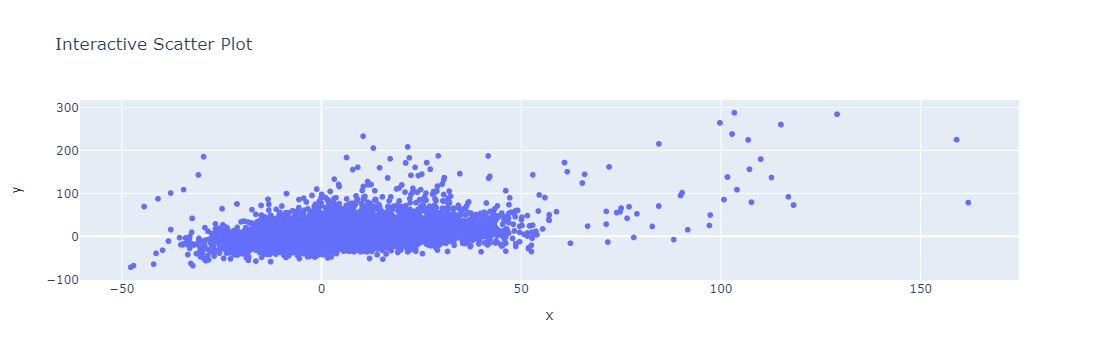

<Figure size 1400x800 with 0 Axes>

In [71]:
plt.figure(figsize=(14,8))
df = pd.DataFrame({'x': data['Sales YOY % - SA'], 'y': data['Transaction YOY % - NSA']})
fig = px.scatter(df, x='x', y='y', title='Interactive Scatter Plot')
#sns.scatterplot(df , x='x', y = 'y')
#plt.tight_layout()
fig.show()